[Question 1] [15 points]
Suppose that you are conducting a scientific experiment where you are observing the effects of one
variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy). On visualizing the
relationship between the variables, you see the following plot:
Your goal is to come up with a linear regression model that can take the training data (x_train.npy and
y_train.npy) and model the relationship between the variables x and y. You should implement your
own version of linear regression either using gradient descent or normal equations. You SHOULD
NOT use any pre-packaged library such as Sci-Kit Learn.
Here are somethings to keep in mind for tackling this problem:
1. Try to plot this relationship on your own using matplotlib. You can also visualize the test data
to see if it gives you any clues about the underlying relationship between the variables.
2. Use your knowledge gleaned from the previous step to answer the following questions:
a. Is the relationship linear?
b. Do you need feature engineering to add any non-linearity?
i. If so, how can you engineer these features?
ii. What are some functions that you can try?
1. Plot each of them individually to verify!
You will need to write a short report detailing your thought process, the code you wrote in Python to
implement the linear regression model and the equation that models the relationship between x and y
that you found. You should provide evidence that corroborates your final statement such as plots,
prediction errors, etc.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
# Load data
x_train = np.load('x_train.npy')
y_train = np.expand_dims(np.load('y_train.npy'), axis=1)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy')

In [3]:
# feature normalization
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

x_train = NormalizeData(x_train)
y_train = NormalizeData(y_train)
x_test = NormalizeData(x_test)
y_test = NormalizeData(y_test)

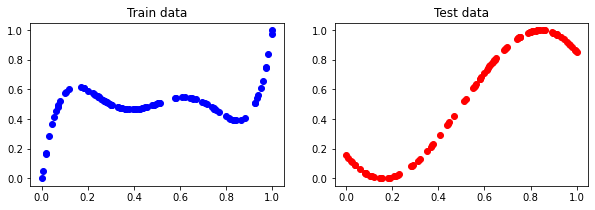

In [4]:
# plotting the data
plt.figure(figsize = (10,3))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, c='b') 
plt.title("Train data")
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, c='r') 
plt.title("Test data")
plt.show()

In [5]:
# adding bias term
x_train = np.hstack((np.ones_like(x_train), x_train))
x_test = np.hstack((np.ones_like(x_test), x_test))

### Linear Regression function

In [6]:
def LinearRegression(x_train,y_train):
    
    def get_gradient(w, x, y):
        y_estimate = x.dot(w).flatten()
        error = (y.flatten() - y_estimate)
        mse = (1.0/len(x))*np.sum(np.power(error, 2))
        gradient = -(1.0/len(x)) * error.dot(x)
        return gradient, mse

    w = np.random.randn(2)
    alpha = 0.1
    tolerance = 1e-5

    # Perform Gradient Descent
    iterations = 1
    while True:
        gradient, error = get_gradient(w, x_train, y_train)
        new_w = w - alpha * gradient

        # Stopping Condition
        if np.sum(abs(new_w - w)) < tolerance:
            print("Converged.")
            break

        # Print error every 50 iterations
        if iterations % 100 == 0:
            print("Iteration: %d - Error: %.4f" %(iterations, error))

        iterations += 1
        w = new_w

    print ("w =",w)
    
    return w

### LR on train data

In [7]:
w = LinearRegression(x_train, y_train)

Iteration: 100 - Error: 0.0269
Iteration: 200 - Error: 0.0177
Iteration: 300 - Error: 0.0153
Iteration: 400 - Error: 0.0147
Iteration: 500 - Error: 0.0145
Iteration: 600 - Error: 0.0144
Iteration: 700 - Error: 0.0144
Iteration: 800 - Error: 0.0144
Iteration: 900 - Error: 0.0144
Converged.
w = [0.41575395 0.18320782]


### Plot LR on train data

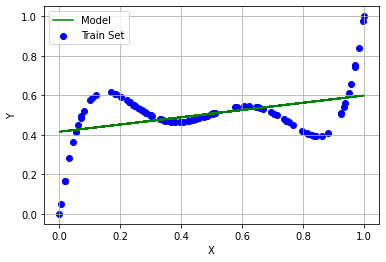

In [8]:
plt.plot(x_train[:,1], x_train.dot(w), c='g', label='Model')
plt.scatter(x_train[:,1], y_train, c='b', label='Train Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### LR on test data

In [9]:
w = LinearRegression(x_test, y_test)

Iteration: 100 - Error: 0.1512
Iteration: 200 - Error: 0.0477
Iteration: 300 - Error: 0.0228
Iteration: 400 - Error: 0.0168
Iteration: 500 - Error: 0.0154
Iteration: 600 - Error: 0.0150
Iteration: 700 - Error: 0.0149
Iteration: 800 - Error: 0.0149
Iteration: 900 - Error: 0.0149
Iteration: 1000 - Error: 0.0149
Iteration: 1100 - Error: 0.0149
Converged.
w = [-0.08735153  1.20617246]


### Plot LR on test data

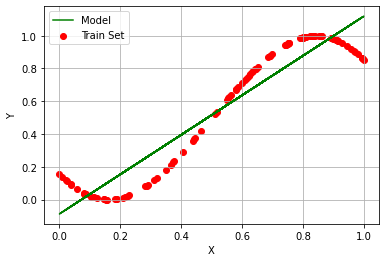

In [10]:
plt.plot(x_test[:,1], x_test.dot(w), c='g', label='Model')
plt.scatter(x_test[:,1], y_test, c='r', label='Train Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# """"""""""""""""""""""""""""""""""""""""

In [11]:
global model_order
model_order = 5 # select model order

x_train_p = np.load('x_train.npy')
x_test_p = np.load('x_test.npy') 

x_train_p = NormalizeData(x_train_p)
x_test_p = NormalizeData(x_test_p)

x_train_p = np.power(x_train_p, range(model_order))
x_test_p = np.power(x_test_p, range(model_order))

### Polynomial regression function

In [12]:
def PolyReg(x_train_p, y_train):

    def get_gradient_p(w_p, x, y):
        y_estimate = x.dot(w_p).flatten()
        error = (y.flatten() - y_estimate)
        mse = (1.0/len(x))*np.sum(np.power(error, 2))
        gradient = -(1.0/len(x)) * error.dot(x)
        return gradient, mse

    w_p = np.random.randn(model_order)
    alpha = 0.5
    tolerance = 1e-6

    # Perform Stochastic Gradient Descent
    epochs = 1
    decay = 0.99
    batch_size = 5
    iterations = 0
    while True:
        order = np.random.permutation(len(x_train_p))
        x_train_p = x_train_p[order]
        y_train = y_train[order]
        b=0
        while b < len(x_train_p):
            tx = x_train_p[b : b+batch_size]
            ty = y_train[b : b+batch_size]
            gradient = get_gradient_p(w_p, tx, ty)[0]
            error = get_gradient_p(w_p, x_train_p, y_train)[1]
            w_p -= alpha * gradient
            iterations += 1
            b += batch_size

        # Keep track of our performance
        if epochs%100==0:
            new_error = get_gradient_p(w_p, x_train_p, y_train)[1]
            print("Epoch: %d - Error: %.4f" %(epochs, new_error))

            # Stopping Condition
            if abs(new_error - error) < tolerance:
                print("Converged.")
                break

        alpha = alpha * (decay ** int(epochs/1000))
        epochs += 1

    print("w =",w_p)
    print("Total iterations =", iterations)
    
    return w_p

In [13]:
w_p = PolyReg(x_train_p, y_train)

Epoch: 100 - Error: 0.0124
Epoch: 200 - Error: 0.0094
Epoch: 300 - Error: 0.0085
Epoch: 400 - Error: 0.0081
Epoch: 500 - Error: 0.0084
Epoch: 600 - Error: 0.0073
Epoch: 700 - Error: 0.0074
Epoch: 800 - Error: 0.0078
Epoch: 900 - Error: 0.0073
Epoch: 1000 - Error: 0.0073
Epoch: 1100 - Error: 0.0072
Epoch: 1200 - Error: 0.0073
Epoch: 1300 - Error: 0.0072
Epoch: 1400 - Error: 0.0072
Converged.
w = [ 0.2682198   1.72133422 -2.50569586 -1.38369367  2.71789542]
Total iterations = 28000


### Plot PLR on train data

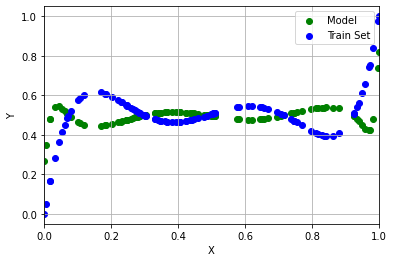

In [14]:
y_model = np.polyval(w_p[::-1], y_train)
plt.scatter(x_train_p[:,1], y_model, c='g', label='Model')
plt.scatter(x_train_p[:,1], y_train, c='b', label='Train Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,1)
plt.show()

### Plot PLR on test data

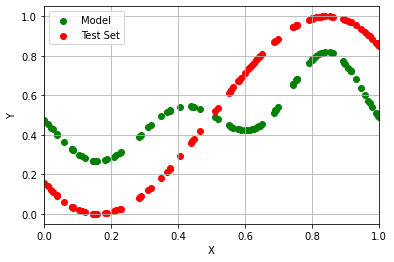

In [15]:
y_model_test = np.polyval(w_p[::-1], y_test)
plt.scatter(x_test_p[:,1], y_model_test, c='g', label='Model')
plt.scatter(x_test_p[:,1], y_test, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,1)
plt.show()